In [3]:
import os
import json

In [8]:
# Define la ruta de la carpeta donde están las imágenes y el archivo JSON de posiciones
image_folder = 'E:/Universidad/TFM-DATOS/train'
pos_file = 'E:/Universidad/TFM-DATOS/train_anno.json'

# Ancho y altura del cuadrado que contiene al satélite
distance_bbox = 7

# Ancho y altura de las imágenes del dataset
width_images = 640
height_images = 480

In [21]:
# Carga el archivo JSON de posiciones
with open(pos_file) as f:
    data = json.load(f)

In [22]:
# Loop a través de los objetos de la lista y crear un archivo Darknet para cada imagen
for obj in data:
    sequence_id = obj['sequence_id']
    frame = obj['frame']
    num_objects = obj['num_objects']
    object_coords = obj['object_coords']
    print(f"CREANDO TXT PARA SECUENCIA {sequence_id} Y IMAGEN {frame}")

    # Crear un archivo Darknet para la imagen
    darknet_filename = os.path.join(image_folder, f"{sequence_id}/{frame}.txt")
    with open(darknet_filename, 'w') as darknet_file:
        for i in range(num_objects):
            # Convertir las coordenadas del objeto a formato YOLOv8 (x_center, y_center, width, height)
            x_center = object_coords[i][0] / width_images
            y_center = object_coords[i][1] / height_images
            width = distance_bbox / width_images # Ajustar el ancho del objeto como se desee
            height = distance_bbox / height_images # Ajustar la altura del objeto como se desee

            if x_center >= 0 and y_center >= 0:
                darknet_coords = (x_center, y_center, width, height)

                # Escribir la coordenada del objeto en el archivo Darknet
                darknet_line = f"0 {x_center} {y_center} {width} {height}\n"  # 0 es el índice de la clase
                darknet_file.write(darknet_line)

CREANDO TXT PARA SECUENCIA 1 Y IMAGEN 1
CREANDO TXT PARA SECUENCIA 1 Y IMAGEN 2
CREANDO TXT PARA SECUENCIA 1 Y IMAGEN 3
CREANDO TXT PARA SECUENCIA 1 Y IMAGEN 4
CREANDO TXT PARA SECUENCIA 1 Y IMAGEN 5
CREANDO TXT PARA SECUENCIA 2 Y IMAGEN 1
CREANDO TXT PARA SECUENCIA 2 Y IMAGEN 2
CREANDO TXT PARA SECUENCIA 2 Y IMAGEN 3
CREANDO TXT PARA SECUENCIA 2 Y IMAGEN 4
CREANDO TXT PARA SECUENCIA 2 Y IMAGEN 5
CREANDO TXT PARA SECUENCIA 3 Y IMAGEN 1
CREANDO TXT PARA SECUENCIA 3 Y IMAGEN 2
CREANDO TXT PARA SECUENCIA 3 Y IMAGEN 3
CREANDO TXT PARA SECUENCIA 3 Y IMAGEN 4
CREANDO TXT PARA SECUENCIA 3 Y IMAGEN 5
CREANDO TXT PARA SECUENCIA 4 Y IMAGEN 1
CREANDO TXT PARA SECUENCIA 4 Y IMAGEN 2
CREANDO TXT PARA SECUENCIA 4 Y IMAGEN 3
CREANDO TXT PARA SECUENCIA 4 Y IMAGEN 4
CREANDO TXT PARA SECUENCIA 4 Y IMAGEN 5
CREANDO TXT PARA SECUENCIA 5 Y IMAGEN 1
CREANDO TXT PARA SECUENCIA 5 Y IMAGEN 2
CREANDO TXT PARA SECUENCIA 5 Y IMAGEN 3
CREANDO TXT PARA SECUENCIA 5 Y IMAGEN 4
CREANDO TXT PARA SECUENCIA 5 Y IMAGEN 5


Coordenadas: (484, 303) - (491, 310)


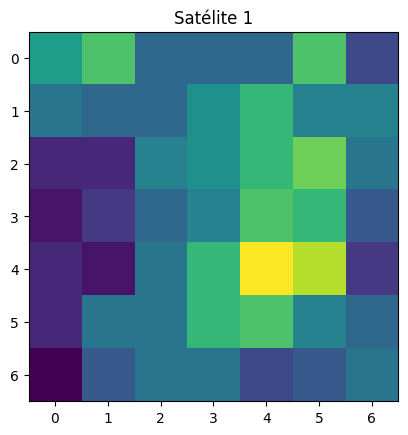

In [23]:
import matplotlib.pyplot as plt

file_in_particular = "/2/1"

# Ruta de la imagen de la que se van a recortar los objetos
image_path = image_folder + file_in_particular + ".png"

# Ruta del archivo Darknet para la imagen
darknet_path = image_folder + file_in_particular + '.txt'

# Cargar la imagen
image = plt.imread(image_path)

# Loop a través de las líneas del archivo Darknet y recortar los objetos
with open(darknet_path, 'r') as f:
    for i, line in enumerate(f):
        # Obtener las coordenadas del objeto
        class_index, x_center, y_center, width, height = map(float, line.strip().split())
        xmin = int((x_center - width/2) * width_images)
        ymin = int((y_center - height/2) * height_images)
        xmax = int((x_center + width/2) * width_images)
        ymax = int((y_center + height/2) * height_images)

        # Recortar la región de interés de la imagen
        print(f"Coordenadas: ({xmin}, {ymin}) - ({xmax}, {ymax})")
        object_image = image[ymin:ymax, xmin:xmax]

        #object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen del objeto en un plot separado
        plt.imshow(object_image)
        plt.title(f'Satélite {i+1}')
        plt.show()


In [6]:
count = 0
for obj in data:
    num_objects = obj['num_objects']
    if num_objects == 0:
      count+=1

print(len(data))
print(count)

6400
1625


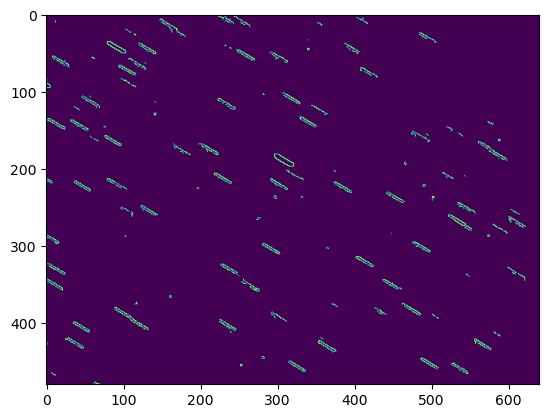

Coordenadas: (498, 233) - (505, 240)


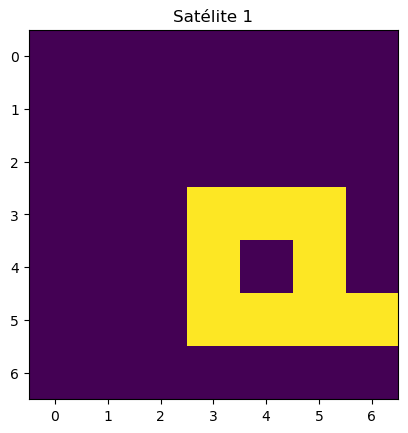

Coordenadas: (486, 218) - (493, 225)


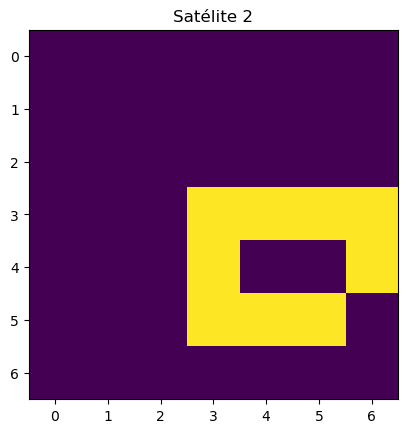

Coordenadas: (137, 125) - (144, 132)


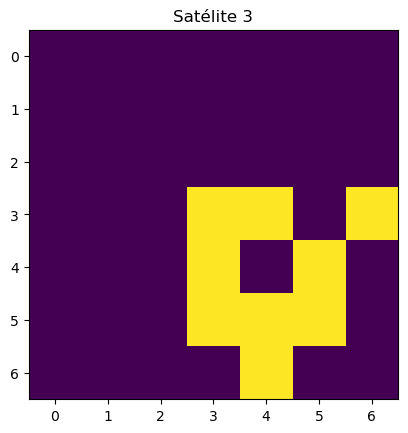

In [9]:
import cv2
import matplotlib.pyplot as plt

file_in_particular = "/1/1"

# Ruta de la imagen de la que se van a recortar los objetos
image_path = image_folder + file_in_particular + ".png"

# Ruta del archivo Darknet para la imagen
darknet_path = image_folder + file_in_particular + '.txt'

# Cargar la imagen
image = cv2.imread(image_path)
#image = cv2.resize(image, (320,240), interpolation=cv2.INTER_CUBIC)

height_images = image.shape[0]
width_images = image.shape[1]

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 25, 40)

plt.imshow(edges)
plt.show()

# Loop a través de las líneas del archivo Darknet y recortar los objetos
with open(darknet_path, 'r') as f:
    for i, line in enumerate(f):
        # Obtener las coordenadas del objeto
        class_index, x_center, y_center, width, height = map(float, line.strip().split())
        xmin = int((x_center - width/2) * width_images)
        ymin = int((y_center - height/2) * height_images)
        xmax = int((x_center + width/2) * width_images)
        ymax = int((y_center + height/2) * height_images)

        # Recortar la región de interés de la imagen
        print(f"Coordenadas: ({xmin}, {ymin}) - ({xmax}, {ymax})")
        
        object_image = edges[ymin:ymax, xmin:xmax]

        #object_image = cv2.cvtColor(object_image, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen del objeto en un plot separado
        plt.imshow(object_image)
        plt.title(f'Satélite {i+1}')
        plt.show()

In [3]:
import os
import cv2

contador = 0
total = len(os.listdir(image_folder))

for folder in os.listdir(image_folder):
    folder_path = os.path.join(image_folder, folder)
    if os.path.isdir(folder_path):
      for file in os.listdir(folder_path):
        extension = file.split('.')
        if extension[1] == "png" and len(extension[0]) == 1:
          img_path = os.path.join(folder_path, file)

          txt_path = os.path.join(folder_path, extension[0] + ".txt")

          img = cv2.imread(img_path)

          lista_coords = {"90":[],"180":[],"270":[]}

          with open(txt_path, 'r') as f:
            for i, line in enumerate(f):

              class_index, x_center, y_center, p_w_norm, p_h_norm = map(float, line.strip().split())

              # GIRAR 90 GRADOS

              x_t = 1 - y_center
              y_t = x_center
              p_w_t = p_h_norm
              p_h_t = p_w_norm

              lista_coords["90"].append((x_t,y_t,p_w_t,p_h_t))

              # GIRAR 180 GRADOS

              x_t = 1 - x_center
              y_t = 1 - y_center
              p_w_t = p_w_norm
              p_h_t = p_h_norm

              lista_coords["180"].append((x_t,y_t,p_w_t,p_h_t))

              # GIRAR 270 GRADOS

              x_t = y_center
              y_t = 1 - x_center
              p_w_t = p_h_norm
              p_h_t = p_w_norm

              lista_coords["270"].append((x_t,y_t,p_w_t,p_h_t))

          with open(os.path.join(folder_path, extension[0] + "_90.txt"), "w") as f:
            for i in lista_coords["90"]:
              if i[0] >= 0 and i[0] <= 1 and i[1] >= 0 and i[1] <= 1:
                  darknet_line = f"0 {i[0]} {i[1]} {i[2]} {i[3]}\n"
                  f.write(darknet_line)

          img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
          cv2.imwrite(os.path.join(folder_path, extension[0] + "_90.png"), img_90)

          with open(os.path.join(folder_path, extension[0] + "_180.txt"), "w") as f:
            for i in lista_coords["180"]:
              if i[0] >= 0 and i[0] <= 1 and i[1] >= 0 and i[1] <= 1:
                  darknet_line = f"0 {i[0]} {i[1]} {i[2]} {i[3]}\n"
                  f.write(darknet_line)

          img_180 = cv2.rotate(img, cv2.ROTATE_180)
          cv2.imwrite(os.path.join(folder_path, extension[0] + "_180.png"), img_180)

          with open(os.path.join(folder_path, extension[0] + "_270.txt"), "w") as f:
            for i in lista_coords["270"]:
              if i[0] >= 0 and i[0] <= 1 and i[1] >= 0 and i[1] <= 1:
                  darknet_line = f"0 {i[0]} {i[1]} {i[2]} {i[3]}\n"
                  f.write(darknet_line)

          img_270 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
          cv2.imwrite(os.path.join(folder_path, extension[0] + "_270.png"), img_270)

    contador += 1
    print("CARPETAS HECHAS: (" + str(contador) + "/" + str(total) + ")")

CARPETAS HECHAS: (1/1281)
CARPETAS HECHAS: (2/1281)
CARPETAS HECHAS: (3/1281)
CARPETAS HECHAS: (4/1281)
CARPETAS HECHAS: (5/1281)
CARPETAS HECHAS: (6/1281)
CARPETAS HECHAS: (7/1281)
CARPETAS HECHAS: (8/1281)
CARPETAS HECHAS: (9/1281)
CARPETAS HECHAS: (10/1281)
CARPETAS HECHAS: (11/1281)
CARPETAS HECHAS: (12/1281)
CARPETAS HECHAS: (13/1281)
CARPETAS HECHAS: (14/1281)
CARPETAS HECHAS: (15/1281)
CARPETAS HECHAS: (16/1281)
CARPETAS HECHAS: (17/1281)
CARPETAS HECHAS: (18/1281)
CARPETAS HECHAS: (19/1281)
CARPETAS HECHAS: (20/1281)
CARPETAS HECHAS: (21/1281)
CARPETAS HECHAS: (22/1281)
CARPETAS HECHAS: (23/1281)
CARPETAS HECHAS: (24/1281)
CARPETAS HECHAS: (25/1281)
CARPETAS HECHAS: (26/1281)
CARPETAS HECHAS: (27/1281)
CARPETAS HECHAS: (28/1281)
CARPETAS HECHAS: (29/1281)
CARPETAS HECHAS: (30/1281)
CARPETAS HECHAS: (31/1281)
CARPETAS HECHAS: (32/1281)
CARPETAS HECHAS: (33/1281)
CARPETAS HECHAS: (34/1281)
CARPETAS HECHAS: (35/1281)
CARPETAS HECHAS: (36/1281)
CARPETAS HECHAS: (37/1281)
CARPETAS H

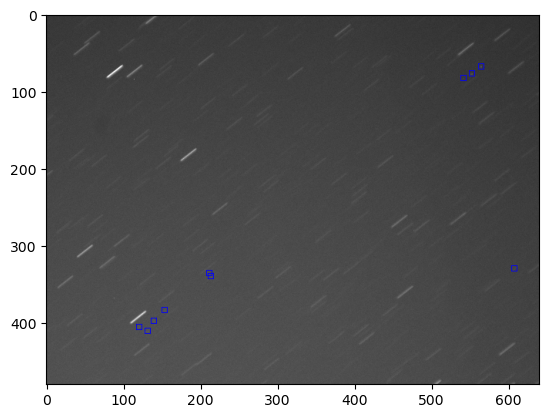

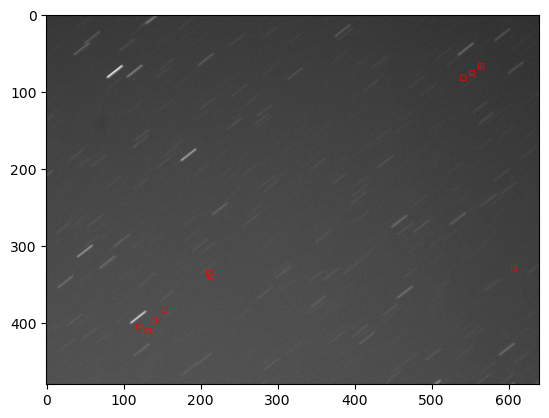

In [6]:
import matplotlib.pyplot as plt
import cv2

path = image_folder + "/448/1"

img = cv2.imread(path + ".png")

height_images = img.shape[0]
width_images = img.shape[1]

darknet_path = path + ".txt"

with open(darknet_path, 'r') as f:
    for i, line in enumerate(f):
        # Obtener las coordenadas del objeto
        class_index, x_center, y_center, width, height = map(float, line.strip().split())
        xmin = int((x_center - width/2) * width_images)
        ymin = int((y_center - height/2) * height_images)
        xmax = int((x_center + width/2) * width_images)
        ymax = int((y_center + height/2) * height_images)

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,0,255), thickness=1)

plt.imshow(img)
plt.show()


grados = "270"

img = cv2.imread(path + "_" + grados + ".png")

height_images = img.shape[0]
width_images = img.shape[1]

darknet_path = path + "_" + grados + ".txt"

with open(darknet_path, 'r') as f:
    for i, line in enumerate(f):
        # Obtener las coordenadas del objeto
        class_index, x_center, y_center, width, height = map(float, line.strip().split())
        xmin = int((x_center - width/2) * width_images)
        ymin = int((y_center - height/2) * height_images)
        xmax = int((x_center + width/2) * width_images)
        ymax = int((y_center + height/2) * height_images)

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255,0,0), thickness=1)

if grados == "90":
  rotation = cv2.ROTATE_90_COUNTERCLOCKWISE
if grados == "180":
  rotation = cv2.ROTATE_180
if grados == "270":
  rotation = cv2.ROTATE_90_CLOCKWISE


img = cv2.rotate(img, rotation)

plt.imshow(img)
plt.show()

## Test crop method

Xmax: 551, Xmin: 483, Ymax: 280, Ymin: 88


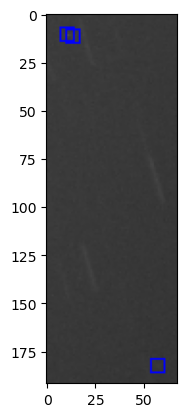

In [5]:
import matplotlib.pyplot as plt
import cv2

path = image_folder + "/492/1"

img = cv2.imread(path + ".png")

height_images = img.shape[0]
width_images = img.shape[1]

darknet_path = path + ".txt"

listaX = []
listaY = []

with open(darknet_path, 'r') as f:
    for i, line in enumerate(f):
        # Obtener las coordenadas del objeto
        class_index, x_center, y_center, width, height = map(float, line.strip().split())
        xmin = int((x_center - width/2) * width_images)
        ymin = int((y_center - height/2) * height_images)
        xmax = int((x_center + width/2) * width_images)
        ymax = int((y_center + height/2) * height_images)

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,0,255), thickness=1)
        
        listaX.append(x_center * width_images)
        listaY.append(y_center * height_images)

if len(listaX) != 0 and len(listaY) != 0:
    min = 1000
    max = -1

    for i in listaX:
        if i < min:
            min = i
        if i > max:
            max = i

    width_centered = (max + min) / 2

    diferencia_width = max - min + 20

    min = 1000
    max = -1

    for i in listaY:
        if i < min:
            min = i
        if i > max:
            max = i

    height_centered = (max + min) / 2

    diferencia_height = max - min + 20

    xmax = int(width_centered + diferencia_width / 2)
    xmin = int(width_centered - diferencia_width / 2)
    ymax = int(height_centered + diferencia_height / 2)
    ymin = int(height_centered - diferencia_height / 2)

    print(f'Xmax: {xmax}, Xmin: {xmin}, Ymax: {ymax}, Ymin: {ymin}')

    img2 = img[ymin:ymax,xmin:xmax]
    plt.imshow(img2)
    plt.show()

## Test flip method

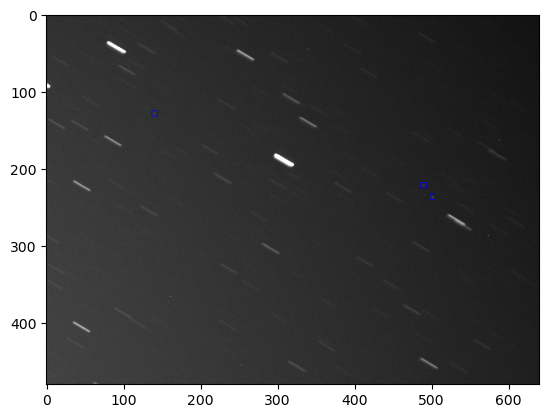

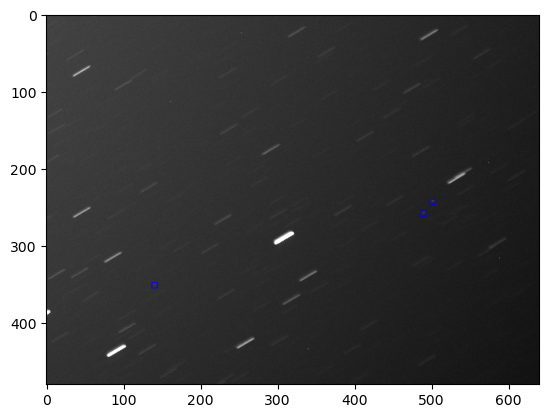

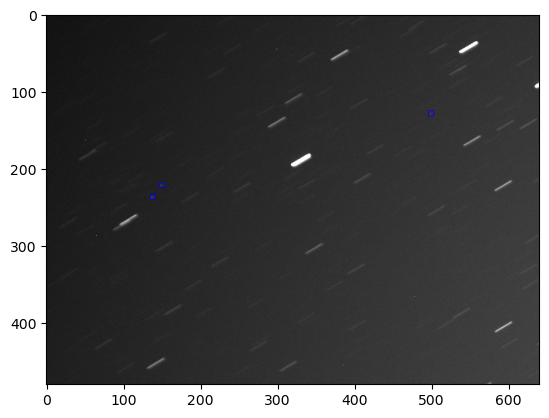

In [19]:
import matplotlib.pyplot as plt
import cv2

path = image_folder + "/1/1"

img = cv2.imread(path + ".png")

height_images = img.shape[0]
width_images = img.shape[1]

# flip the image by vertically
img_h = cv2.flip(img, 0)
img_v = cv2.flip(img, 1)

darknet_path = path + ".txt"

with open(darknet_path, 'r') as f:
    for i, line in enumerate(f):
        # Obtener las coordenadas del objeto
        class_index, x_center, y_center, width, height = map(float, line.strip().split())
        xmin = int((x_center - width/2) * width_images)
        ymin = int((y_center - height/2) * height_images)
        xmax = int((x_center + width/2) * width_images)
        ymax = int((y_center + height/2) * height_images)

        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0,0,255), thickness=1)

        ymin_h = height_images - ymin
        ymax_h = height_images - ymax

        xmin_v = width_images - xmin
        xmax_v = width_images - xmax

        cv2.rectangle(img_h, (xmin, ymin_h), (xmax, ymax_h), (0,0,255), thickness=1)
        cv2.rectangle(img_v, (xmin_v, ymin), (xmax_v, ymax), (0,0,255), thickness=1)


# display the rotated image
plt.imshow(img)
plt.show()

plt.imshow(img_h)
plt.show()

plt.imshow(img_v)
plt.show()

## Data augmentation: Flip images vertically and horizontally

In [28]:
import os
import cv2

contador = 0
total = len(os.listdir(image_folder))

for folder in os.listdir(image_folder):
  folder_path = os.path.join(image_folder, folder)
  if os.path.isdir(folder_path):
    for file in os.listdir(folder_path):
      extension = file.split('.')
      if extension[1] == "png" and "flip" not in extension[0]:
        img_path = os.path.join(folder_path, file)

        txt_path = os.path.join(folder_path, extension[0] + ".txt")

        img = cv2.imread(img_path)

        lista_coords = {"flipH":[],"flipV":[]}

        with open(txt_path, 'r') as f:
            for i, line in enumerate(f):
                # Obtener las coordenadas del objeto
                class_index, x_center, y_center, width, height = map(float, line.strip().split())

                y_center_h = 1 - y_center

                lista_coords["flipH"].append((x_center,y_center_h,width,height))

                x_center_v = 1 - x_center

                lista_coords["flipV"].append((x_center_v,y_center,width,height))


        with open(os.path.join(folder_path, extension[0] + "_flipH.txt"), "w") as f:
          for i in lista_coords["flipH"]:
            if i[0] >= 0 and i[0] <= 1 and i[1] >= 0 and i[1] <= 1:
                darknet_line = f"0 {i[0]} {i[1]} {i[2]} {i[3]}\n"
                f.write(darknet_line)

        img_h = cv2.flip(img, 0)
        cv2.imwrite(os.path.join(folder_path, extension[0] + "_flipH.png"), img_h)

        with open(os.path.join(folder_path, extension[0] + "_flipV.txt"), "w") as f:
          for i in lista_coords["flipV"]:
            if i[0] >= 0 and i[0] <= 1 and i[1] >= 0 and i[1] <= 1:
                darknet_line = f"0 {i[0]} {i[1]} {i[2]} {i[3]}\n"
                f.write(darknet_line)

        img_h = cv2.flip(img, 1)
        cv2.imwrite(os.path.join(folder_path, extension[0] + "_flipV.png"), img_h)

  contador += 1
  print("CARPETAS HECHAS: (" + str(contador) + "/" + str(total) + ")")

CARPETAS HECHAS: (1/1281)
CARPETAS HECHAS: (2/1281)
CARPETAS HECHAS: (3/1281)
CARPETAS HECHAS: (4/1281)
CARPETAS HECHAS: (5/1281)
CARPETAS HECHAS: (6/1281)
CARPETAS HECHAS: (7/1281)
CARPETAS HECHAS: (8/1281)
CARPETAS HECHAS: (9/1281)
CARPETAS HECHAS: (10/1281)
CARPETAS HECHAS: (11/1281)
CARPETAS HECHAS: (12/1281)
CARPETAS HECHAS: (13/1281)
CARPETAS HECHAS: (14/1281)
CARPETAS HECHAS: (15/1281)
CARPETAS HECHAS: (16/1281)
CARPETAS HECHAS: (17/1281)
CARPETAS HECHAS: (18/1281)
CARPETAS HECHAS: (19/1281)
CARPETAS HECHAS: (20/1281)
CARPETAS HECHAS: (21/1281)
CARPETAS HECHAS: (22/1281)
CARPETAS HECHAS: (23/1281)
CARPETAS HECHAS: (24/1281)
CARPETAS HECHAS: (25/1281)
CARPETAS HECHAS: (26/1281)
CARPETAS HECHAS: (27/1281)
CARPETAS HECHAS: (28/1281)
CARPETAS HECHAS: (29/1281)
CARPETAS HECHAS: (30/1281)
CARPETAS HECHAS: (31/1281)
CARPETAS HECHAS: (32/1281)
CARPETAS HECHAS: (33/1281)
CARPETAS HECHAS: (34/1281)
CARPETAS HECHAS: (35/1281)
CARPETAS HECHAS: (36/1281)
CARPETAS HECHAS: (37/1281)
CARPETAS H